Exercise problems from Chapter 3, Sampling the Imaginary, of @mcelreath2020statistical.

In [ ]:
import arviz as az
import numpy as np
import pymc3 as pm

from matplotlib import pylab as plt
from scipy import stats

In [ ]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

In [ ]:
def grid_approx(num_grid_points, successes, tosses):
  p_grid = np.linspace( 0 , 1 , int(num_grid_points) )
  prior = np.repeat( 1 , int(num_grid_points) ) # uniform prior
  likelihood = stats.binom.pmf( k=successes , n=tosses , p=p_grid )
  unstd_posterior = prior * likelihood
  posterior = unstd_posterior / unstd_posterior.sum()
  return p_grid, posterior

In [ ]:
p_grid , posterior = grid_approx( 1000 , 6 , 9 )
# Generate samples from the posterior
samples = np.random.choice( p_grid , p=posterior , size=int(1e4) , replace=True )

## 3E1

From the samples, how much posterior probability lies below $p=0.2$?

In [ ]:
np.sum( samples < 0.2 ) /1e4 

0.0008

## 3E2

From the samples, how much posterior probability lies above $p=0.8$?

In [ ]:
np.sum( samples > 0.8 ) /1e4 

0.1243

## 3E3

From the samples, how much posterior probability lies between $p=0.2$ and $p=0.8$?

In [ ]:
np.sum( (samples > 0.2) & (samples < 0.8) ) /1e4 

0.8749

## 3E4

From the samples, $20\%$ of the posterior probability lies below which value of $p$?

In [ ]:
np.quantile( samples , 0.2 )

0.5175175175175175

## 3E5

From the samples, $20\%$ of the posterior probability lies above which value of $p$?

In [ ]:
np.quantile( samples , 0.8 )

0.7627627627627628

## 3E6

Which values of $p$ contain the narrowest interval equal to $66\%$ of the posterior probability?

In [ ]:
az.hdi( samples , hdi_prob=0.66 )

array([0.53053053, 0.8028028 ])

## 3E7

Which values of $p$ contain $66\%$ of the posterior probability, assuming equal posterior probability both below and above the interval?

In [ ]:
np.quantile( samples , (0.17, 0.66 + 0.17) )

array([0.5005005 , 0.77777778])

## 3M1

Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

In [ ]:
p_grid, posterior = grid_approx(1e3, 8, 15)

## 3M2

Draw 10,000 samples from the posterior above. Then use the samples to calculate the 90% HPDI for p.

In [ ]:
samples = np.random.choice( p_grid , p=posterior , size=int(1e4) , 
                           replace=True )
az.hdi( samples , hdi_prob=0.9 )

array([0.34034034, 0.72572573])

## 3M3

Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?

In [ ]:
# Conduct 1 experiment where we toss the globe 15 times 
# and the fraction of the water on the globe is 0.5 
# and record the number of waters.
np.random.binomial( n=15 , p=0.5 , size=1 )

array([9])

In [ ]:
# Conduct 2 experiment where we toss the globe 15 times 
# and the fraction of the water on the globe is 0.2 and 0.5 in the first and 
# second experiment respectively.
# Record the number of waters.
np.random.binomial( n=15 , p= [0.2, 0.5] )

array([3, 7])

In [ ]:
ppd = np.random.binomial( n=15 , p=samples )
ppd.shape

(10000,)

In [ ]:
from collections import Counter

In [ ]:
count_dict = Counter(ppd)
# We recorded 8 waters as the outcome in 1,460 out of the 10,000 experiments
count_dict

Counter({0: 7,
         1: 35,
         2: 119,
         3: 260,
         4: 525,
         5: 833,
         6: 1199,
         7: 1412,
         8: 1460,
         9: 1337,
         10: 1169,
         11: 791,
         12: 522,
         13: 241,
         14: 73,
         15: 17})

Text(0, 0.5, 'count')

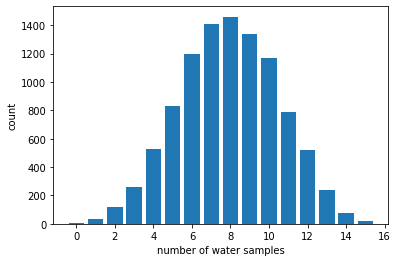

In [ ]:
possible_num_waters = sorted( count_dict.keys()  )
plt.bar( possible_num_waters , 
        [count_dict[waters] for waters in possible_num_waters ] )
plt.xlabel('number of water samples')
plt.ylabel('count')

In [ ]:
# There is 14.6% probability of observing 8 waters in 15 tosses
np.sum( ppd == 8) / ppd.shape[0]

0.146

## 3M4

Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [ ]:
ppd = np.random.binomial( n=9 , p=samples )
np.sum( ppd == 6) / ppd.shape[0]

0.1789

## 3M5 

Start over at 3M1, but now use a prior that is zero below p=0.5 and a constant above p=0.5. This corresponds to prior information that a majority of the Earth's surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value p=0.7.

In [ ]:
np.heaviside( np.array([0, 0.25, 0.5, 0.75, 1]) - 0.5, 0.5) * 2

array([0., 0., 1., 2., 2.])

In [ ]:
np.array([0, 0.25, 0.5, 0.75, 1]) >= 0.5

array([False, False,  True,  True,  True])

In [ ]:
( np.array([0, 0.25, 0.5, 0.75, 1]) >= 0.5 ).astype(int)

array([0, 0, 1, 1, 1])

In [ ]:
( np.array([0, 0.25, 0.5, 0.75, 1]) >= 0.5 ).astype(int) * 2.

array([0., 0., 2., 2., 2.])

In [ ]:
def grid_approx2(num_grid_points, successes, tosses):
  p_grid = np.linspace( 0 , 1 , int(num_grid_points) )
  prior = ( p_grid >= 0.5 ).astype(int) * 2. # truncated prior
  likelihood = stats.binom.pmf( k=successes , n=tosses , p=p_grid )
  unstd_posterior = prior * likelihood
  posterior = unstd_posterior / unstd_posterior.sum()
  return p_grid, posterior

In [ ]:
p_grid, posterior = grid_approx2(1e3, 8, 15) #3M1'

# 3M2'
samples = np.random.choice( p_grid , p=posterior , size=int(1e4) 
                           , replace=True )
az.hdi( samples , hdi_prob=0.9 )

array([0.5005005 , 0.71271271])

In [ ]:
# 3M3'
ppd = np.random.binomial( n=15 , p=samples )

count_dict = Counter(ppd)
count_dict

Counter({1: 2,
         2: 6,
         3: 45,
         4: 127,
         5: 341,
         6: 664,
         7: 1107,
         8: 1623,
         9: 1739,
         10: 1613,
         11: 1359,
         12: 825,
         13: 383,
         14: 141,
         15: 25})

Text(0, 0.5, 'count')

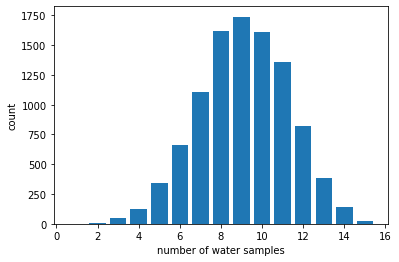

In [ ]:
possible_num_waters = sorted( count_dict.keys()  )
plt.bar( possible_num_waters , 
        [count_dict[waters] for waters in possible_num_waters ] )
plt.xlabel('number of water samples')
plt.ylabel('count')

In [ ]:
# reasonable amount of mass on 10 waters
# 0.7 is the true fraction of water covering the globe
print(f'Likelihood {(np.sum( ppd == int(15*0.7) ) / ppd.shape[0]):0.4f} of observing 10 waters in 15 tosses')

Likelihood 0.1613 of observing 10 waters in 15 tosses


In [ ]:
print(f'Likelihood {(np.sum( ppd == 8) / ppd.shape[0]):0.4f} of observing 8 waters in 15 tosses')

Likelihood 0.1623 of observing 8 waters in 15 tosses


## 3M6

Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this?

In [ ]:
p_water = np.linspace(0,1,10) # ground truth of the fraction of water on Earth

for p_true in p_water:
  converged=False
  N_tosses=1
  while not converged:
    # if we observe int(N_tosses*p_true) waters in N_tosses
    # get the posterior distribution of the fraction of water
    p_grid, posterior = grid_approx( 1e3, int(N_tosses*p_true), N_tosses )
    # get samples from the posterior
    samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
    # compute the 99% interval
    interval = np.quantile( samples , (0.05, 0.995) )
    # get the width of the interval
    width = interval[1] - interval[0]
    converged = ( width <= 0.05 )
    # print(p_true, N_tosses, width)
    N_tosses += 1
  print(f'{p_true:0.2f}', N_tosses)

0.00 104
0.11 729
0.22 1217
0.33 1523
0.44 1722
0.56 1698
0.67 1509
0.78 1190
0.89 668
1.00 59


## Hard

The Hard problems here all use the data below. These data indicate the gender (male=1, female=0) of officially reported first and second born children in 100 two-child families.

In [ ]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [ ]:
np.sum(birth1) + np.sum(birth2)

111

In [ ]:
birth1.shape[0] + birth2.shape[0]

200

## 3H1

Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

In [ ]:
p_grid, posterior = grid_approx(1000, np.sum(birth1) + np.sum(birth2), 
                                birth1.shape[0] + birth2.shape[0])
p_grid[ np.argmax(posterior) ]

0.5545545545545546

##3H2

Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior density intervals.

In [ ]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

In [ ]:
print(f'50% HPDI {az.hdi(samples, hdi_prob=0.5)}')
print(f'89% HPDI {az.hdi(samples, hdi_prob=0.89)}')
print(f'97% HPDI {az.hdi(samples, hdi_prob=0.97)}')

50% HPDI [0.52552553 0.57357357]
89% HPDI [0.5005005  0.61161161]
97% HPDI [0.48248248 0.63263263]


## 3H3

Use rbinom to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the dens command (part of the rethinking package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?

In [ ]:
sampled_births = np.random.binomial(n=200, p=samples)
sampled_births[:10]

array([106, 116, 117, 134, 115, 105, 124, 106, 109, 122])


It looks like the model fits the data well and the distribution of predictions includes the actual observation of 111 boys as a central, likely outcome.

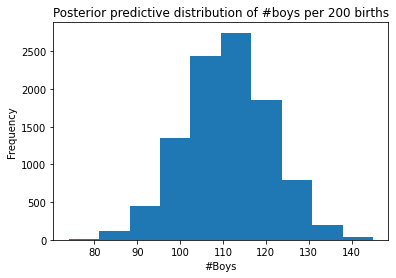

In [ ]:
plt.hist(sampled_births)
plt.title("Posterior predictive distribution of #boys per 200 births")
plt.xlabel("#Boys")
plt.ylabel("Frequency");

## 3H4

Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, birth1. How does the model look in this light?


<matplotlib.lines.Line2D>

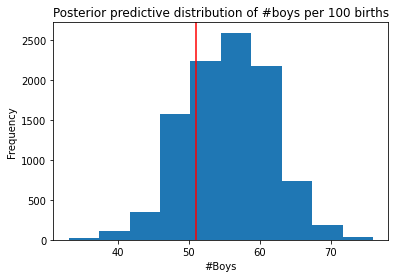

In [ ]:
first_births = np.random.binomial(n=100, p=samples)
plt.hist(first_births)
plt.title("Posterior predictive distribution of #boys per 100 births")
plt.xlabel("#Boys")
plt.ylabel("Frequency");
plt.axvline(np.sum(birth1), c="r", label="Observed births")

In [ ]:
print(f'number of boys in birth1 is {np.sum(birth1)}')

number of boys in birth1 is 51


In first_births 51 is not in the center of the predicted number of boys.

##3H5

The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times. Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

In [ ]:
#number of first borns who were girls
girls_first_born = birth1.shape[0] - np.sum(birth1)
girls_first_born

49

In [ ]:
# Conduct 10,000 experiments where in each experiment 
# we simulate births in the 49 families which had girl first borns
# we record the outcome of the number of boys
second_births_after_gfb = np.random.binomial( n=girls_first_born, p=samples )
second_births_after_gfb[:10]

array([24, 35, 28, 25, 32, 24, 25, 28, 30, 24])

<matplotlib.lines.Line2D>

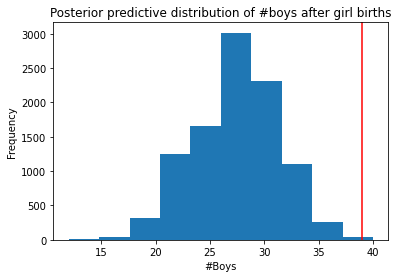

In [ ]:
plt.hist(second_births_after_gfb)
plt.title("Posterior predictive distribution of #boys after girl births")
plt.xlabel("#Boys")
plt.ylabel("Frequency");
plt.axvline(np.sum(birth2[birth1==0]), c="r", label="Observed births")

More boy births were observed in comparison to what our model predicts to be the likely outcomes. This means that the independence assumption we made in our small world model of each birth being of either sex does not hold for this dataset. 